In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
downloaded = drive.CreateFile({'id':'1Blpp94I9dOaMt7V4nB-0meR4FygacAwN'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Real_combine.csv') 

In [5]:
import pandas as pd


In [6]:
df=pd.read_csv('Real_combine.csv')

In [7]:
df

,Unnamed: 0,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,1,26.7,33.0,20.0,1012.4,60.0,5.1,4.4,13.0,284.795833
1,3,29.1,35.0,20.5,1011.9,49.0,5.8,5.2,14.8,219.720833
2,5,28.4,36.0,21.0,1011.3,46.0,5.3,5.7,11.1,182.187500
3,7,25.9,32.0,20.0,1011.8,56.0,6.1,6.9,11.1,154.037500
4,9,24.8,31.1,20.6,1013.6,58.0,4.8,8.3,11.1,223.208333
...,...,...,...,...,...,...,...,...,...,...
638,1277,28.5,33.4,20.9,1012.6,59.0,5.3,6.3,14.8,185.500000
639,1279,24.9,33.2,14.8,1011.5,48.0,4.2,4.6,13.0,166.875000
640,1281,26.4,32.0,20.9,1011.2,70.0,3.9,6.7,9.4,200.333333
641,1283,20.8,25.0,14.5,1016.8,78.0,4.7,5.9,11.1,349.291667


In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,26.7,33.0,20.0,1012.4,60.0,5.1,4.4,13.0,284.795833
1,29.1,35.0,20.5,1011.9,49.0,5.8,5.2,14.8,219.720833
2,28.4,36.0,21.0,1011.3,46.0,5.3,5.7,11.1,182.187500
3,25.9,32.0,20.0,1011.8,56.0,6.1,6.9,11.1,154.037500
4,24.8,31.1,20.6,1013.6,58.0,4.8,8.3,11.1,223.208333
...,...,...,...,...,...,...,...,...,...
638,28.5,33.4,20.9,1012.6,59.0,5.3,6.3,14.8,185.500000
639,24.9,33.2,14.8,1011.5,48.0,4.2,4.6,13.0,166.875000
640,26.4,32.0,20.9,1011.2,70.0,3.9,6.7,9.4,200.333333
641,20.8,25.0,14.5,1016.8,78.0,4.7,5.9,11.1,349.291667


In [10]:
!pip install optuna

     |████████████████████████████████| 235kB 2.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 163kB 8.6MB/s 
     |████████████████████████████████| 81kB 4.9MB/s 
     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 112kB 11.3MB/s 
     |████████████████████████████████| 133kB 8.5MB/s 
  Created wheel for optuna: filename=optuna-2.1.0-cp36-none-any.whl size=321090 sha256=9c21bce5623d99493864c35d33e98e04a8dbf74d4ce1e8443293eaf01494277b
  Stored in directory: /root/.cache/pip/wheels/9f/25/24/a165483933b5eefbf4f93c85f3188dc696cbb38620b73ad713
Successfully built optuna
  Created wheel for pyperclip: filename=pyperclip-1.8.0-cp36-none-any.whl size=8693 sha256=88f85ade94803207951fc1788a99d3aad96f438bb753d0edef67f85ca0090f50
  Stored in directory: /root/.cache/pip/wheels/b2/

In [18]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [19]:
import optuna


In [43]:
def objective(trial):
    df=pd.read_csv('Real_combine.csv')
    df.drop(['Unnamed: 0'],axis=1,inplace=True)
    X=df.iloc[:,:-1]
    y=df.iloc[:,-1]

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)


    criterion = trial.suggest_categorical("criterion", ["mse", "mae"])
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    n_estimators = trial.suggest_int("n_estimators", 100,500)

    rf = sklearn.ensemble.RandomForestRegressor(criterion =criterion,
            max_depth=max_depth, 
            n_estimators=n_estimators
        )

    score = cross_val_score(rf, X, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150)

[I 2020-09-19 10:30:21,903] A new study created in memory with name: no-name-9675aa95-d0ac-4f9e-8361-d496a6900f8e
[I 2020-09-19 10:30:25,382] Trial 0 finished with value: 0.34834617759346864 and parameters: {'criterion': 'mse', 'max_depth': 14, 'n_estimators': 311}. Best is trial 0 with value: 0.34834617759346864.
[I 2020-09-19 10:30:29,702] Trial 1 finished with value: 0.3441085807448987 and parameters: {'criterion': 'mae', 'max_depth': 18, 'n_estimators': 147}. Best is trial 0 with value: 0.34834617759346864.
[I 2020-09-19 10:30:34,154] Trial 2 finished with value: 0.38595975276972955 and parameters: {'criterion': 'mae', 'max_depth': 3, 'n_estimators': 328}. Best is trial 2 with value: 0.38595975276972955.
[I 2020-09-19 10:30:35,273] Trial 3 finished with value: 0.3500675119710583 and parameters: {'criterion': 'mse', 'max_depth': 29, 'n_estimators': 144}. Best is trial 2 with value: 0.38595975276972955.
[I 2020-09-19 10:30:48,246] Trial 4 finished with value: 0.3575352054206597 and p

In [44]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.39546731804528235
Best hyperparameters: {'criterion': 'mse', 'max_depth': 3, 'n_estimators': 320}


In [45]:

optuna.visualization.plot_optimization_history(study)

In [46]:
optuna.visualization.plot_slice(study)


In [47]:

trial

FrozenTrial(number=29, value=0.39546731804528235, datetime_start=datetime.datetime(2020, 9, 19, 10, 32, 32, 645213), datetime_complete=datetime.datetime(2020, 9, 19, 10, 32, 34, 52679), params={'criterion': 'mse', 'max_depth': 3, 'n_estimators': 320}, distributions={'criterion': CategoricalDistribution(choices=('mse', 'mae')), 'max_depth': IntLogUniformDistribution(high=32, low=2, step=1), 'n_estimators': IntUniformDistribution(high=500, low=100, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=29, state=TrialState.COMPLETE)

In [48]:
study.best_params


{'criterion': 'mse', 'max_depth': 3, 'n_estimators': 320}

In [49]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)


In [50]:
tuned=RandomForestRegressor(n_estimators=320,max_depth=3,criterion='mse')

In [51]:
tuned.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=320, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
y_prediction=tuned.predict(X_test)

In [53]:
from sklearn import metrics

In [54]:
sklearn.metrics.mean_squared_error(y_test,y_prediction)

3584.571960357996

In [55]:
import matplotlib.pyplot as plt


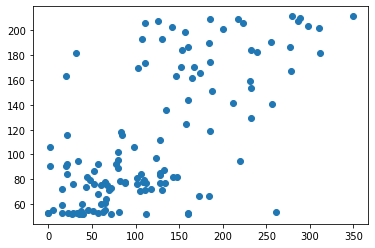

In [56]:
plt.scatter(y_test,y_prediction)

In [57]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



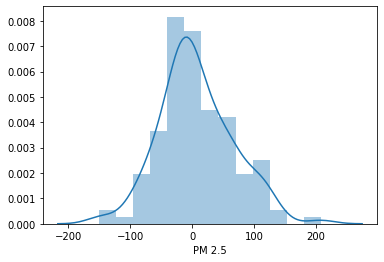

In [58]:
sns.distplot(y_test-y_prediction)